Enter a name to search: Dave Madigan


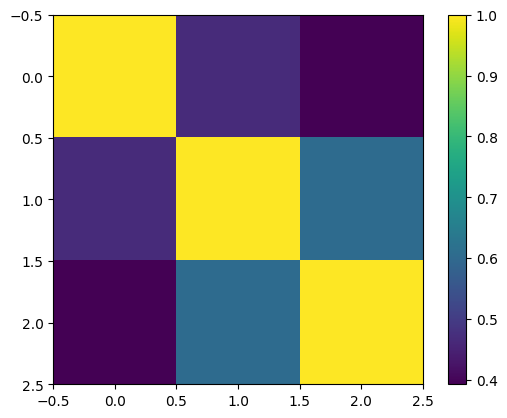

In [12]:
# CS6120 Assignment 1: Better Together
# https://kwchurch.github.io/teaching/2023-fall/CS6120/assignments/assignment.01/Better_Together.html
# By Edward Burke, 9/13/2023
import json,requests
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib
import matplotlib.pyplot as plt

# NOTE TO GRADER Occasionally one of the searches returns
# "{'message': 'Network error commun...h endpoint'}",
# and I can't really figure out why or reproduce it reliably.
# I suspect that it is just caused by a random "blip" in my internet connection
# This is a serverside issue, so I don't really have a way to address it,
# but if something seems to be working then suddenly fails, try re-running it

name = input('Enter a name to search: ')
#name = 'Dave Madigan' # For testing, comment out otherwise

# Build the URL to search the entered name
jString = 'https://api.semanticscholar.org/graph/v1/author/search?query=' + name + '&fields=name,citationCount,papers,papers.citationCount'
j = requests.get(jString).json()
embeddings = np.zeros(shape=(768, 0))
vector = np.array([])

# Loop to build the data array
for x in j['data']:
  for y in x['papers']:
    # Get vectors from paper IDs
    pString = 'https://api.semanticscholar.org/graph/v1/paper/' + y.get('paperId') + '?fields=title,embedding,citationCount,title'
    p = requests.get(pString).json()
    embed = p['embedding']
    # Some papers don't always return embeddings, this skips them
    if embed is None:
      continue
    vector = np.asarray(embed['vector'])
    embeddings = np.concatenate((vector.reshape(-1, 1), embeddings), axis=1)

# Readys the final array for display
similar = cosine_similarity(embeddings.T)

# Plot output data
plt.imshow(similar)
plt.colorbar()